In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# 데이터 불러오기
data = pd.read_csv("C:/dataset/diabetes.csv", index_col=0)

In [4]:
# 데이터 통계 및 정보 확인
print(data.info())
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
Index: 768 entries, 6 to 1
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Glucose                   768 non-null    int64  
 1   BloodPressure             768 non-null    int64  
 2   SkinThickness             768 non-null    int64  
 3   Insulin                   768 non-null    int64  
 4   BMI                       768 non-null    float64
 5   DiabetesPedigreeFunction  768 non-null    float64
 6   Age                       768 non-null    int64  
 7   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 54.0 KB
None
          Glucose  BloodPressure  SkinThickness     Insulin         BMI  \
count  768.000000     768.000000     768.000000  768.000000  768.000000   
mean   120.894531      69.105469      20.536458   79.799479   31.992578   
std     31.972618      19.355807      15.952218  115.244002    7.884160 

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


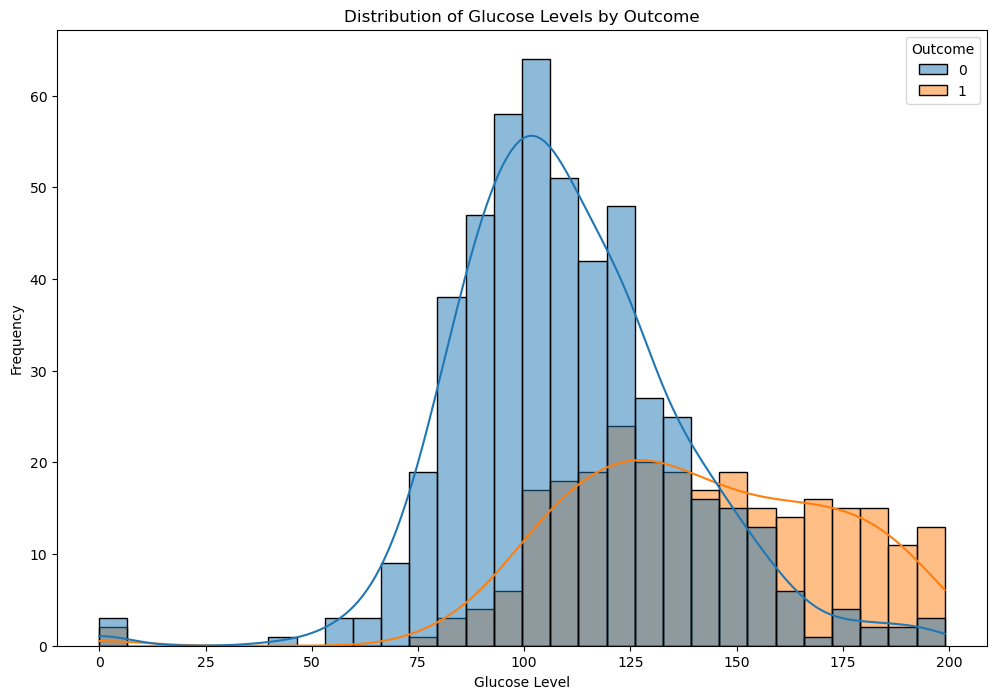

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


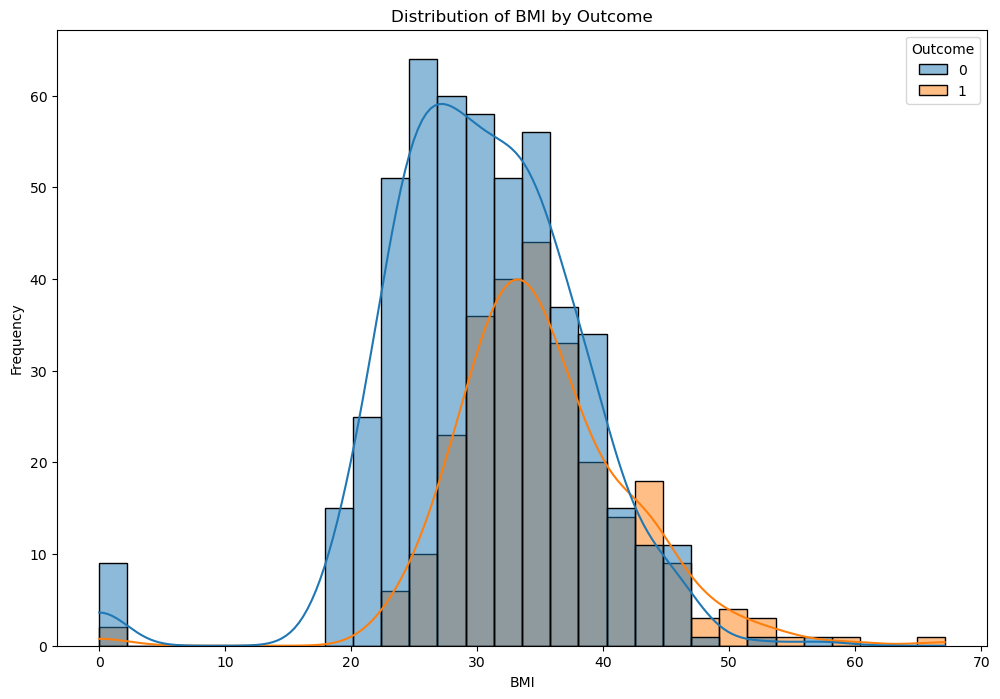

In [5]:
# 데이터 시각화: 각 특성의 분포
plt.figure(figsize=(12, 8))
sns.histplot(data=data, x='Glucose', hue='Outcome', kde=True, bins=30)
plt.title('Distribution of Glucose Levels by Outcome')
plt.xlabel('Glucose Level')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(12, 8))
sns.histplot(data=data, x='BMI', hue='Outcome', kde=True, bins=30)
plt.title('Distribution of BMI by Outcome')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.show()

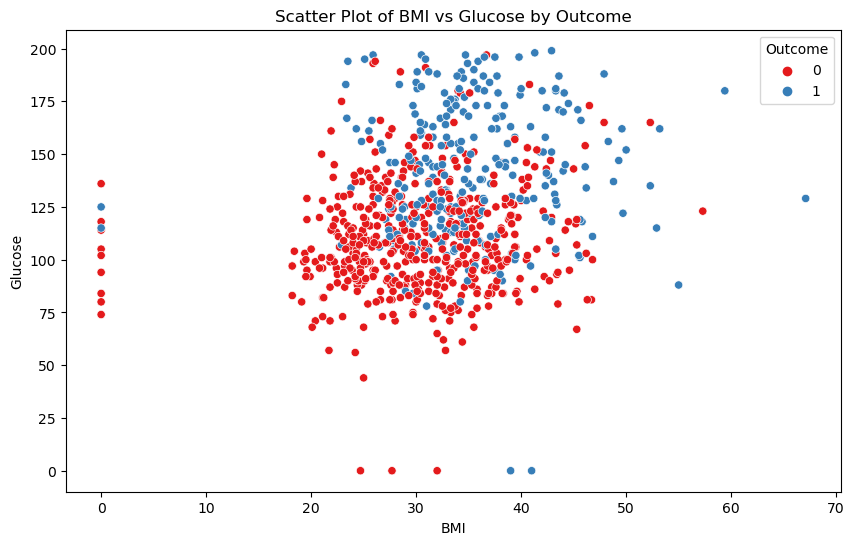

In [6]:
# 데이터 시각화: 산점도
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='BMI', y='Glucose', hue='Outcome', palette='Set1')
plt.title('Scatter Plot of BMI vs Glucose by Outcome')
plt.xlabel('BMI')
plt.ylabel('Glucose')
plt.show()

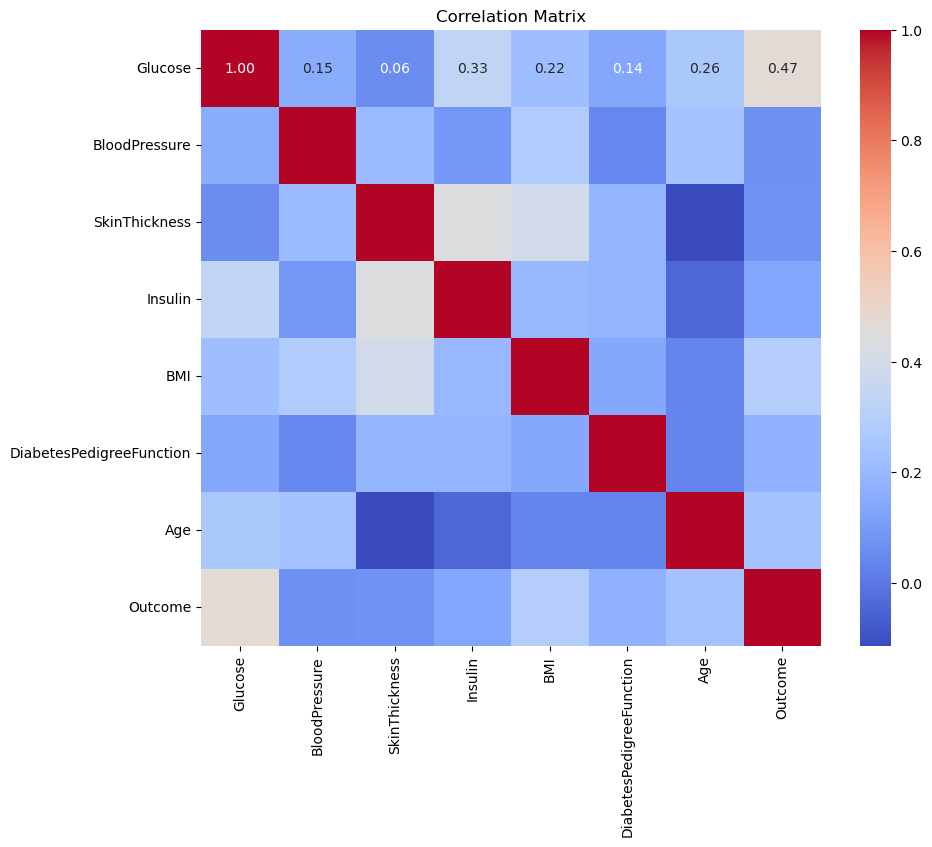

In [7]:
# 상관 행렬 시각화
plt.figure(figsize=(10, 8))
corr = data.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [8]:
# 데이터 전처리
X = data.drop('Outcome', axis=1).values  # 특징
y = data['Outcome'].values                # 레이블

In [9]:
# 데이터 정규화
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [10]:
# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [31]:
# CNN 모델 구축
def build_cnn_model():
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Reshape((7, 1), input_shape=(7,))) 
    model.add(tf.keras.layers.Conv1D(filters=32, kernel_size=2, activation='relu')) 
    model.add(tf.keras.layers.MaxPooling1D(pool_size=1)) 
    model.add(tf.keras.layers.Conv1D(filters=64, kernel_size=2, activation='relu')) 
    model.add(tf.keras.layers.MaxPooling1D(pool_size=1)) 
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(128, activation='relu'))
    model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
    
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model


In [32]:
# 모델 학습
cnn_model = build_cnn_model()
history = cnn_model.fit(X_train, y_train, epochs=20, validation_split=0.2)

Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.6127 - loss: 0.6481 - val_accuracy: 0.6667 - val_loss: 0.5986
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7096 - loss: 0.5481 - val_accuracy: 0.7480 - val_loss: 0.5009
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7455 - loss: 0.4845 - val_accuracy: 0.7724 - val_loss: 0.4799
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7445 - loss: 0.4886 - val_accuracy: 0.7561 - val_loss: 0.4831
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8022 - loss: 0.4311 - val_accuracy: 0.7480 - val_loss: 0.4778
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8114 - loss: 0.4108 - val_accuracy: 0.7561 - val_loss: 0.4985
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7815 - loss: 0.4602 - val_accuracy: 0.7642 - val_loss: 0.4724
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8024 - loss: 0.4181 - val_accuracy: 0.7642 - val_loss

In [33]:
# 모델 저장
cnn_model.save('diabetes_cnn_model.keras')

In [34]:
# 모델 평가
loss, accuracy = cnn_model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.2f}")

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7359 - loss: 0.5809 
Test Accuracy: 0.74


In [35]:
# 사전 학습 모델 불러오기 및 미세 조정
base_model = tf.keras.models.load_model('diabetes_cnn_model.keras')

In [36]:
# 새로운 층 추가
new_model = tf.keras.models.Sequential()
new_model.add(base_model)
new_model.add(tf.keras.layers.Dense(64, activation='relu'))
new_model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [37]:
# 모델 컴파일
new_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5), 
                  loss='binary_crossentropy', 
                  metrics=['accuracy'])

In [39]:
# 모델 학습
cnn_model = build_cnn_model()
history_fine_tune = cnn_model.fit(X_train, y_train, epochs=10, validation_split=0.2)

Epoch 1/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - accuracy: 0.5817 - loss: 0.6732 - val_accuracy: 0.6667 - val_loss: 0.6158
Epoch 2/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7064 - loss: 0.5584 - val_accuracy: 0.6992 - val_loss: 0.5378
Epoch 3/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7664 - loss: 0.4845 - val_accuracy: 0.7398 - val_loss: 0.4878
Epoch 4/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8007 - loss: 0.4255 - val_accuracy: 0.7805 - val_loss: 0.4661
Epoch 5/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8148 - loss: 0.4510 - val_accuracy: 0.7642 - val_loss: 0.4808
Epoch 6/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8033 - loss: 0.4275 - val_accuracy: 0.7480 - val_loss: 0.5105
Epoch 7/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7700 - loss: 0.4534 - val_accuracy: 0.7642 - val_loss: 0.4548
Epoch 8/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7984 - loss: 0.4227 - val_accuracy: 0.7561 - val_loss

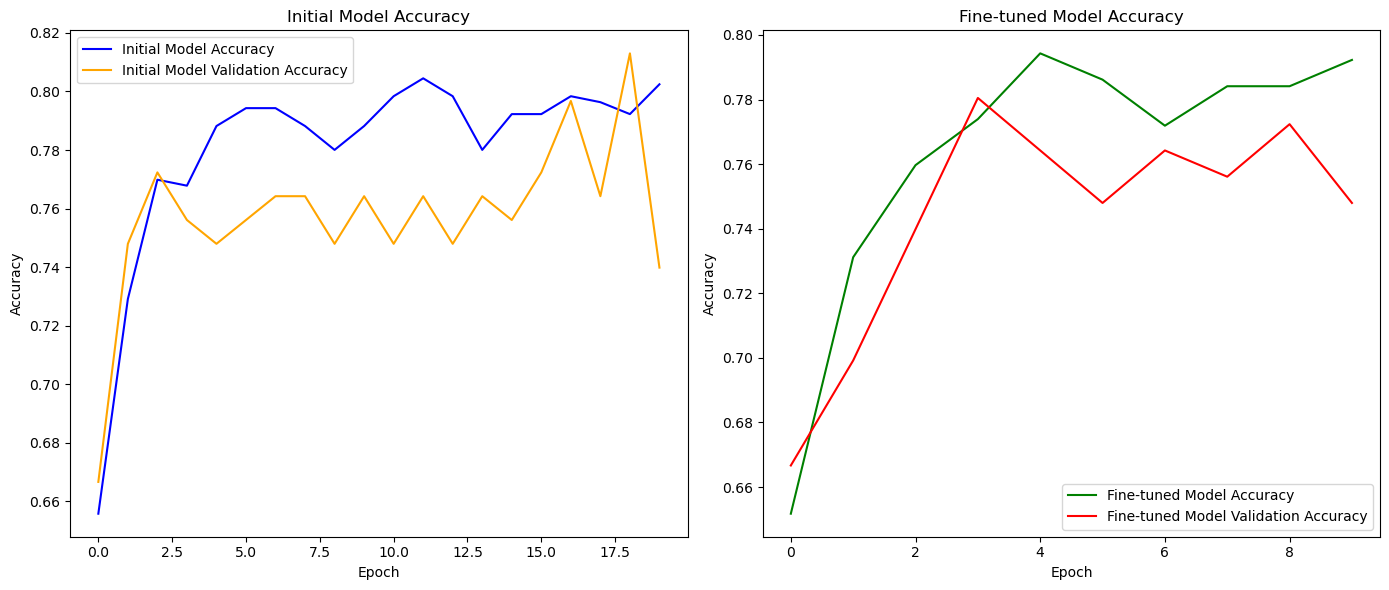

In [40]:
# 결과 시각화
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Initial Model Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Initial Model Validation Accuracy', color='orange')
plt.title('Initial Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_fine_tune.history['accuracy'], label='Fine-tuned Model Accuracy', color='green')
plt.plot(history_fine_tune.history['val_accuracy'], label='Fine-tuned Model Validation Accuracy', color='red')
plt.title('Fine-tuned Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


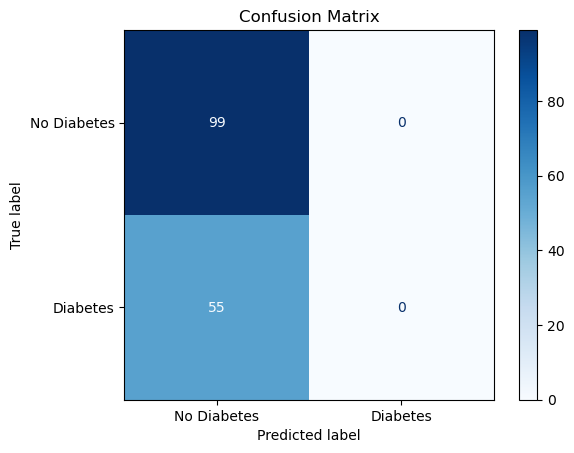

In [41]:
# 추가적인 모델 성능 평가: 혼동 행렬
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = (new_model.predict(X_test) > 0.5).astype("int32")
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Diabetes', 'Diabetes'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


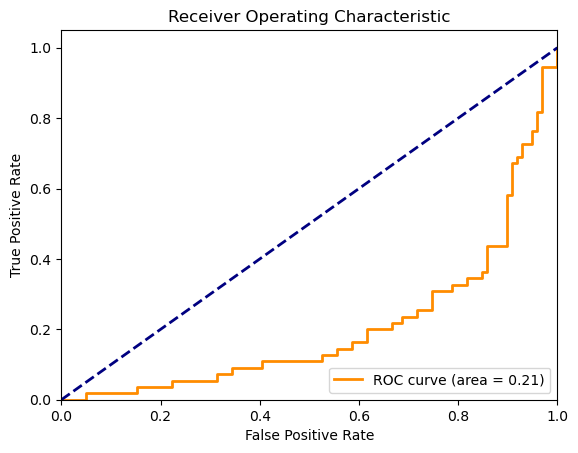

In [42]:
# ROC 곡선 및 AUC
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, new_model.predict(X_test))
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()